In [1]:
import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from scipy.optimize import fsolve
import math
import numpy.linalg as LA
import sympy as sp
import random

In [2]:
tol = 1e-5

In [3]:
x, y, t1, t2, f1, f2, l, L, d = sp.symbols('x y t1 t2 f1 f2 l L d')
la = 13. # l у основания
lb = 13. # l у основания
lc = 4.25 #L
ld = 4.25 #L
l = la # l у основания
L = lc #L
d = 12.
work_space = []
diff_symb = [x, y, t1, t2, f1, f2]
out_and_pass = [x, y, f1, f2]
in_and_pass = [t1, t2, f1, f2]
func1 = sp.Function('func1')
func2 = sp.Function('func2')
func3 = sp.Function('func3')
func4 = sp.Function('func4')

In [4]:
func1 = x-l*sp.cos(t1)-L*sp.cos(f1)
func2 = x-l*sp.cos(t2)-L*sp.cos(f2)-d
func3 = y-l*sp.sin(t1)-L*sp.sin(f1)
func4 = y-l*sp.sin(t2)-L*sp.sin(f2)
F = [func1, func2, func3, func4]

In [5]:
J_out_and_pass = sp.zeros(len(F),len(out_and_pass))
i=0
j=0
while i < len(F):
    j=0
    while j < len(out_and_pass):
        J_out_and_pass[i,j] = sp.diff(F[i], out_and_pass[j])
        j+=1
    i+=1
J_out_and_pass

Matrix([
[1, 0,  4.25*sin(f1),             0],
[1, 0,             0,  4.25*sin(f2)],
[0, 1, -4.25*cos(f1),             0],
[0, 1,             0, -4.25*cos(f2)]])

In [6]:
J_in_and_pass = sp.zeros(len(F),len(in_and_pass))
i=0
j=0
while i < len(F):
    j=0
    while j < len(in_and_pass):
        J_in_and_pass[i,j] = sp.diff(F[i], in_and_pass[j])
        j+=1
    i+=1
J_in_and_pass

Matrix([
[ 13.0*sin(t1),             0,  4.25*sin(f1),             0],
[            0,  13.0*sin(t2),             0,  4.25*sin(f2)],
[-13.0*cos(t1),             0, -4.25*cos(f1),             0],
[            0, -13.0*cos(t2),             0, -4.25*cos(f2)]])

In [7]:
sp.simplify(J_out_and_pass.det())

-18.0625*sin(f1 - f2)

In [8]:
sp.simplify(J_in_and_pass.det())

3052.5625*sin(f1 - t1)*sin(f2 - t2)

In [9]:
symp_sing1 = sp.simplify(J_in_and_pass.det())
const1 = symp_sing1.func(*[term for term in symp_sing1.args if not term.free_symbols])
symp_sing1 = symp_sing1/const1
sing_f_1 = sp.lambdify(diff_symb, symp_sing1, 'numpy')

symp_sing2 = sp.simplify(J_out_and_pass.det())
const2 = symp_sing2.func(*[term for term in symp_sing2.args if not term.free_symbols])
symp_sing2 = symp_sing2/const2
sing_f_2 = sp.lambdify(diff_symb, symp_sing2, 'numpy')

In [10]:
min_val_cartesian, max_val_cartesian = -16, 16
min_val_revolute, max_val_revolute = -np.pi, np.pi
v1 = np.linspace(min_val_cartesian, max_val_cartesian, int((max_val_cartesian-min_val_cartesian)/2)+1)
# v2 = np.linspace(min_val_revolute, max_val_revolute, int((max_val_revolute-min_val_revolute)/2)+1)
v2 = np.linspace(min_val_revolute, max_val_revolute, 5)

appr = []

for i in v1:
    for j in v1:
        for k in v2:
            for o in v2:
                for m in v2:
                    for p in v2:  
                        appr.append([i,j,k,o,m,p])

In [11]:
v1

array([-16., -14., -12., -10.,  -8.,  -6.,  -4.,  -2.,   0.,   2.,   4.,
         6.,   8.,  10.,  12.,  14.,  16.])

In [12]:
v2

array([-3.14159265, -1.57079633,  0.        ,  1.57079633,  3.14159265])

In [13]:
len(appr)

180625

In [14]:
def is_inside(x, y, d):
    D1=(2 * (-1*(x)/(y)) * ( (x)**2/(2*y) + y/2 + (la**2-lc**2)/(2*y) ))**2 - 4*(1 + ((x)**2)/(y**2) ) * ( ( (x)**2/(2*y) + y/2 + (la**2-lc**2)/(2*y) )**2 - la**2) 
    D2=(2 * (-1*(x-d)/(y)) * ( (x-d)**2/(2*y) + y/2 + (la**2-lc**2)/(2*y) ))**2 - 4*(1 + ((x-d)**2)/(y**2) ) * ( ( (x-d)**2/(2*y) + y/2 + (la**2-lc**2)/(2*y) )**2 - la**2)     
    if D1 >= 0 and D2 >= 0:
        work_space.append([x,y])
        return 1
    return 0

In [15]:
def kinematic_eq_sing1(z):
    x = z[0]
    y = z[1]
    t1 = z[2]
    t2 = z[3]
    f1 = z[4]
    f2 = z[5]

    F = np.zeros(6)
    F[0] = (x-l*np.cos(t1)-L*np.cos(f1))
    F[1] = (x-l*np.cos(t2)-L*np.cos(f2)-d)
    F[2] = (y-l*np.sin(t1)-L*np.sin(f1))
    F[3] = (y-l*np.sin(t2)-L*np.sin(f2))
    F[4] = sing_f_1(x,y,t1,t2,f1,f2)
    return F

def kinematic_eq_sing2(z):
    x = z[0]
    y = z[1]
    t1 = z[2]
    t2 = z[3]
    f1 = z[4]
    f2 = z[5]

    F = np.zeros(6)
    F[0] = (x-l*np.cos(t1)-L*np.cos(f1))
    F[1] = (x-l*np.cos(t2)-L*np.cos(f2)-d)
    F[2] = (y-l*np.sin(t1)-L*np.sin(f1))
    F[3] = (y-l*np.sin(t2)-L*np.sin(f2))
    F[4] = sing_f_2(x,y,t1,t2,f1,f2)
    
    return F

Robot work area:


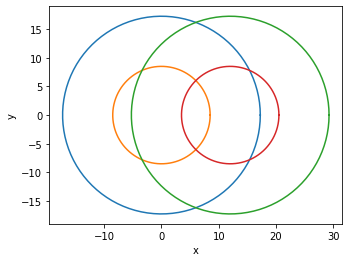

In [16]:
# окружности в питоне легче всего задавать через сферические координаты
# тета меняется от 0 до 2pi
theta = np.linspace(0, 2*np.pi, 100)

x1 = (la+lc)*np.cos(theta)
x2 = (la+lc)*np.sin(theta)
x3 = 2*lc*np.cos(theta)
x4 = 2*lc*np.sin(theta)
x5 = (la+lc)*np.cos(theta)+d
x6 = (la+lc)*np.sin(theta)
x7 = 2*lc*np.cos(theta)+d
x8 = 2*lc*np.sin(theta)

#задаю сетку для расчёта рабочей области
gr_x = np.linspace(-20, 20, 300)
gr_y = np.linspace(-20, 20, 300)
# gr_x = np.linspace(-(la+lc), la+lc+d, 250)
# gr_y = np.linspace(-(la+lc), la+lc+d, 250)
gr_X, gr_Y = np.meshgrid(gr_x,gr_y)
    
fig, ax = plt.subplots(1)
ax.plot(x1, x2)
ax.plot(x3, x4)
ax.plot(x5, x6)
ax.plot(x7, x8)
ax.set_aspect(1)
plt.xlabel('x')
plt.ylabel('y')
print('Robot workspace:')

In [17]:
#функция подсчёта площади
def count_area_new(d_iter):
    S_square=40*40
    number_of_points = len(gr_x)*len(gr_y) #50 000
    number_inside = 0
    for i in range(len(gr_x)):
        for j in range(len(gr_y)):
            number_inside+=is_inside(gr_x[i], gr_y[j], d_iter)
#             is_gran(gr_x[i], gr_y[j], d_iter)
#     S=(S_square*number_inside/number_of_points) # /2 из-за того, что области на графике две, но в реальности она одна
    S = S_square*len(work_space)/number_of_points
    return S

In [18]:
count_area_new(d)

181.79555555555555

Robot work area:


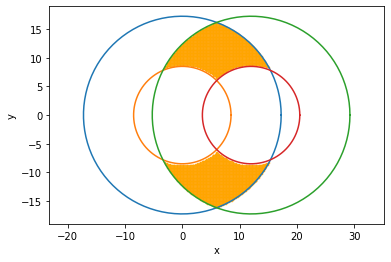

In [19]:
# отрисовка рабочей области
print('Robot work area:')
fig, ax = plt.subplots(1)
ax.plot(x1, x2)
ax.plot(x3, x4)
ax.plot(x5, x6)
ax.plot(x7, x8)
plt.scatter(*zip(*work_space), color = 'orange', s=0.2)
# plt.scatter(*zip(*gran), color = 'black')
plt.axis('equal')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [20]:
z1 = []
i=0
while i < len(appr):
    zGuess = appr[i]
    x_tmp1 = fsolve(kinematic_eq_sing1, zGuess, xtol=tol)
    f_tmp1 = kinematic_eq_sing1(x_tmp1)
    if np.linalg.norm(np.array(f_tmp1)) < tol:
        z1.append(x_tmp1)
    i+=1

C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


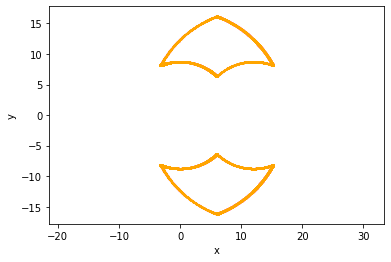

In [21]:
sing_xy1 = []
for i in z1:
    sing_xy1.append([i[0],i[1]])
    
plt.scatter(*zip(*sing_xy1), color = 'orange', s=0.3)
plt.axis('equal')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [22]:
z2 = []
i=0
while i < len(appr):
    zGuess = appr[i]
    x_tmp2 = fsolve(kinematic_eq_sing2, zGuess, xtol=tol)
    f_tmp2 = kinematic_eq_sing2(x_tmp2)
    if np.linalg.norm(np.array(f_tmp2)) < tol:
        z2.append(x_tmp2)
    i+=1

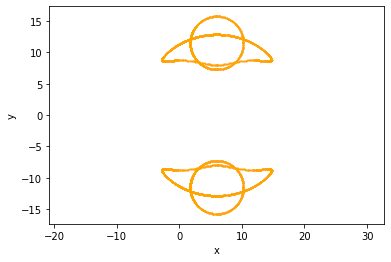

In [23]:
sing_xy2 = []
for i in z2:
    sing_xy2.append([i[0],i[1]])
    
plt.scatter(*zip(*sing_xy2), color = 'orange', s=0.01)
plt.axis('equal')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [24]:
xMin = -20
xMax = 20
yMin = -20
yMax = 20
num_squares = 2**13
square_size = abs(xMax-xMin)/np.sqrt(num_squares)
ox = np.linspace(xMin, xMax, int(np.sqrt(num_squares)+1))
oy = np.linspace(yMin, yMax, int(np.sqrt(num_squares)+1))

In [25]:
start = time.time()

In [26]:
sing_squares_sing1 = []
sing_squares_sing2 = []
ws_new_2 = []

i = 0
while i < len(ox)-1:
    j = 0
    while j < len(oy)-1:
        found1 = False
        found2 = False
        for s1 in sing_xy1:
            if found1 == True:
                break
            if s1[0] >= ox[i]-tol:
                if s1[0] <= ox[i+1] + tol:
                    if s1[1] >= oy[j] - tol:
                        if s1[1] <= oy[j+1] + tol:
                            sing_squares_sing1.append([[ox[i], ox[i+1]],  [oy[j], oy[j+1]]])            
                            found1 = True
        for s2 in sing_xy2:
            if found2 == True:
                break
            if s2[0] >= ox[i]-tol:
                if s2[0] <= ox[i+1] + tol:
                    if s2[1] >= oy[j] - tol:
                        if s2[1] <= oy[j+1] + tol:
                            sing_squares_sing2.append([[ox[i], ox[i+1]],  [oy[j], oy[j+1]]])            
                            found2 = True
        if (is_inside(ox[i]+square_size/2, oy[j]+square_size/2, d) == 1) and (found1 == False) and (found2 == False):
            ws_new_2.append([[ox[i], ox[i+1]],  [oy[j], oy[j+1]]])  
        j+=1
    i+=1

In [27]:
print(len(sing_squares_sing1))
print(len(sing_squares_sing2))
print(len(ws_new_2))

258
329
605


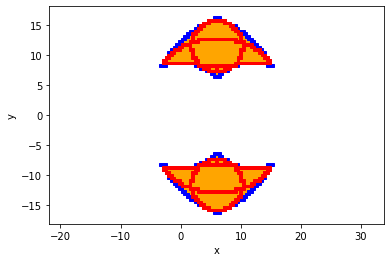

In [28]:
plt.figure()
currentAxis = plt.gca()
for i in ws_new_2:
    someX, someY = i[0][0], i[1][0]
    currentAxis.add_patch(Rectangle((someX, someY), square_size, square_size, alpha=1,color='Orange'))
for i in sing_squares_sing1:
    someX, someY = i[0][0], i[1][0]
    currentAxis.add_patch(Rectangle((someX, someY), square_size, square_size, alpha=1,color='Blue'))
for i in sing_squares_sing2:
    someX, someY = i[0][0], i[1][0]
    currentAxis.add_patch(Rectangle((someX, someY), square_size, square_size, alpha=1,color='Red'))

currentAxis.axis('equal')
plt.xlabel('x')
plt.ylabel('y')
fig.set_size_inches(100, 100)
plt.savefig('sing_ws_sq_13.png', dpi=500)

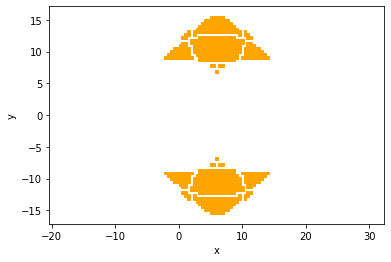

In [29]:
plt.figure()
currentAxis = plt.gca()
for i in ws_new_2:
    someX, someY = i[0][0], i[1][0]
    currentAxis.add_patch(Rectangle((someX, someY), square_size, square_size, alpha=1,color='Orange'))

currentAxis.axis('equal')
plt.xlabel('x')
plt.ylabel('y')
fig.set_size_inches(100, 100)
plt.savefig('ws_sq_13.png', dpi=500)

In [30]:
ws_components = []
ws_to_check = ws_new_2.copy()

while len(ws_to_check) > 0:
    curr_component = []
    init_box = ws_to_check.pop(0)
    curr_component.append(init_box)
    for i in curr_component:
        for j in ws_to_check:
            if np.sqrt( (i[0][0]+square_size/2-(j[0][0]+square_size/2))**2 + (i[1][0]+square_size/2-(j[1][0]+square_size/2))**2 ) < (square_size+square_size*tol):
                curr_component.append(j)
                ws_to_check.remove(j)
    ws_components.append(curr_component)

In [31]:
len(ws_components)

18

In [32]:
end = time.time()
print(end - start)

812.3523197174072


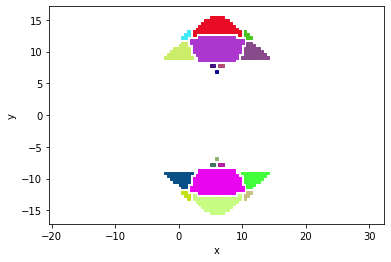

In [33]:
plt.figure()
currentAxis = plt.gca()
for i in ws_components:
    rgb = (random.random(), random.random(), random.random())
    for j in i:
        someX, someY = j[0][0], j[1][0]
        currentAxis.add_patch(Rectangle((someX, someY), square_size, square_size, alpha=1,color=rgb))
currentAxis.axis('equal')
plt.xlabel('x')
plt.ylabel('y')
fig.set_size_inches(100, 100)
plt.savefig('ws_components_sq_13.png', dpi=500)

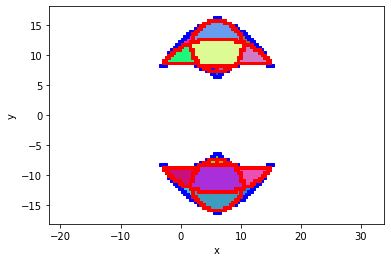

In [34]:
plt.figure()
currentAxis = plt.gca()
for i in ws_components:
    rgb = (random.random(), random.random(), random.random())
    for j in i:
        someX, someY = j[0][0], j[1][0]
        currentAxis.add_patch(Rectangle((someX, someY), square_size, square_size, alpha=1,color=rgb))
for i in sing_squares_sing1:
    someX, someY = i[0][0], i[1][0]
    currentAxis.add_patch(Rectangle((someX, someY), square_size, square_size, alpha=1,color='Blue'))
for i in sing_squares_sing2:
    someX, someY = i[0][0], i[1][0]
    currentAxis.add_patch(Rectangle((someX, someY), square_size, square_size, alpha=1,color='Red'))

currentAxis.axis('equal')
plt.xlabel('x')
plt.ylabel('y')
fig.set_size_inches(100, 100)
plt.savefig('ws_component_sing_sq_13.png', dpi=500)